In [1]:
import thirdparty
from thirdparty import *
from transformers import Blip2Processor, Blip2ForConditionalGeneration

# 导入模型

In [2]:
device=get_device()
model_dir="/root/autodl-tmp/model/"#/root/autodl-tmp/model/
model_path = os.path.join(model_dir,"blip-2")
processor = Blip2Processor.from_pretrained(model_path)
model = Blip2ForConditionalGeneration.from_pretrained(model_path).to(device)
print (model)

/root/miniconda3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/root/miniconda3/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

# 导入数据

In [3]:
text_dir = "/root/autodl-tmp/data/image-text-match/"
with open(os.path.join(text_dir,"train_data"),encoding="utf-8") as f:
    train_lines=[eval(s.strip()) for s in f.readlines()]
print(train_lines[0])
print (len(train_lines))
with open(os.path.join(text_dir,"val_data"),encoding="utf-8") as f:
    val_lines=[eval(s.strip()) for s in f.readlines()]
print(val_lines[0])
print (len(val_lines))
def get_data(lines,path_dir,num=200):
    lines=[s for s in lines  if len(s[1])>0 and len(s[1])<20]
    images=[]
    texts=[]
    for p,text in lines:
        try:  
            path=str(path_dir)+p   
            images.append(path)        
            texts.append(text)
        except:
            continue
    return images,texts
train_images_dir,train_texts=get_data(train_lines,"/root/autodl-tmp/data/COCO/train_image/")
val_images_dir,val_texts=get_data(val_lines,"/root/autodl-tmp/data/COCO/val_image/")

['000000203564.jpg', '自行车复制品 时钟当前轮']
591753
['000000179765.jpg', '一辆黑色本田摩托车停在车库前']
25014


# 模型测试

In [4]:
def get_raw_image(index):
    image_path,text=train_images_dir[index],train_texts[index]
    raw_image = Image.open(image_path).convert('RGB')
    return raw_image

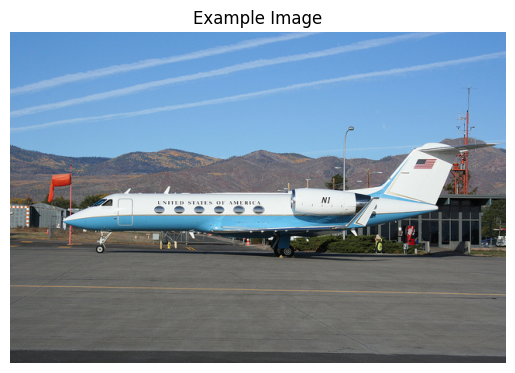

Conditional Output
a plane on the tarmac
UnConditional Output
a white and blue airplane on the tarmac


In [11]:
index = 190400
raw_image = get_raw_image(index)
image_show(np.array(raw_image),"rgb")
prompt = "a photography of"
inputs = processor(images=raw_image, text=prompt, return_tensors="pt").to(device)
generated_ids = model.generate(**inputs)
print("Conditional Output")
print(processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip())
inputs = processor(images=raw_image, return_tensors="pt").to(device)
generated_ids = model.generate(**inputs)
print("UnConditional Output")
print(processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip())